In [226]:
# author: Andrew (Jake) Shullaw 8/13/2021

In [227]:
# automatically run each cell in a notebook and checks that the 
# current output matches the outputs stored in the last saved 
# version of the .ipynb file.
# !pip install nbval

# !py.test --nbval "emission2-annotated.ipynb"  # run this in terminal

In [3]:
# create requirements.txt:
# !pip freeze >  requirements.txt
# check requirements (dependencies):
!requirements.txt

In [229]:
import pathlib

current_path = pathlib.Path.home()  # path that this notebook is currently in
path = current_path.joinpath('Documents','CGI','CAER','JSONs','prod_jsons')  # path to jsons
data = path.glob('*')
data_list = [x for x in data if x.suffix == '.json']  # list of data files

This is how I imported and flattened the JSON df initially.<br>
It is "easier" to just grab the emissions table (since that is the only table I need).

In [230]:
import pandas
import numpy as np
import json
from flatten_json import flatten

jsons = path.glob('*.json')
jsons_list = [str(x) for x in jsons if x.is_file()]
data_list = []
for file in jsons_list:
    with open(file, 'r', encoding='utf-8') as json_file:    
        data = json.load(json_file)
        data_list.append(data)
df = pandas.DataFrame([flatten(d) for d in data_list])  # complete dataframe from file
df

,id,masterFacilityRecordId,frsFacilityId,eisProgramId,altSiteIdentifier,programSystemCode,year,status,validationStatus,eisLastSubmissionStatus,...,facilityContacts_7_stateCode,facilityContacts_7_stateFipsCode,facilityContacts_7_countryCode,facilityContacts_7_postalCode,facilityContacts_7_mailingStreetAddress,facilityContacts_7_mailingCity,facilityContacts_7_mailingStateCode,facilityContacts_7_mailingPostalCode,facilityContacts_7_mailingCountryCode,facilityContacts_7__row
0,1437,191,None,2814011,None,GADNR,2020,APPROVED,PASSED_WARNINGS,QaEmissions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1441,389,None,15069711,None,GADNR,2020,APPROVED,PASSED,QaEmissions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1443,382,None,3679011,None,GADNR,2020,APPROVED,PASSED_WARNINGS,QaFacility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1444,505,None,556111,None,GADNR,2020,APPROVED,PASSED,QaFacility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1466,458,None,3709811,None,GADNR,2020,APPROVED,PASSED,QaEmissions,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,906,459,None,3709911,None,GADNR,2019,APPROVED,PASSED_WARNINGS,Complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,907,255,None,17945411,None,GADNR,2019,APPROVED,PASSED,Complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,917,440,None,946711,None,GADNR,2019,APPROVED,PASSED_WARNINGS,Complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,924,164,None,3699411,None,GADNR,2019,APPROVED,PASSED_WARNINGS,Complete,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
del df  # if in case the first parse method was run

## Keeping Track of Report IDs to Map with Results
-   There is a more efficient way to parse these, but I was crunched for time and went with what worked first

In [232]:
import pandas
import numpy as np
import json
from flatten_json import flatten

jsons = path.glob('*.json')
jsons_list = [str(x) for x in jsons if x.is_file()]  # list of json files
e_list = []
for file in jsons_list:
    with open(file, 'r', encoding='utf-8') as json_file:  # open current json file in list
        i = json.load(json_file)['id']                    # save report id
    with open(file, 'r', encoding='utf-8') as json_file:  # open the same json file
        e_table = json.load(json_file)['emissions']       # save emissions table
        for e in e_table:
            e_list.append(e)  # append emissions table to list
            e_list.append(i)  # append id to list

In [233]:
df = pandas.DataFrame(data=e_list[::2])  # create dataframe with emissions tables
df.rename(columns={'id':'eid'}, inplace=True)  # change emissions table id to eid
df.drop('_row',axis=1,inplace=True)  # drop _row column
df.drop('sheetName',axis=1,inplace=True)  # drop sheetName column
df.insert(0,'id',e_list[1::2])  # create report id column

In [234]:
df

,id,eid,reportingPeriodId,displayName,pollutantCode,totalManualEntry,overallControlPercent,totalEmissions,emissionsUomCode,emissionsFactor,emissionsFactorFormula,emissionsFactorText,emissionsCalcMethodCode,comments,calculationComment,emissionsNumeratorUom,emissionsDenominatorUom,calculatedEmissionsTons
0,1437,139738,41010,BYPFUG-BYP- ALL-Annual(PM10 Primary (Filt + Co...,PM10-PRI,False,None,0.0884327,TON,0.000497,None,AP42,13,None,None,LB,TON,0.0884327
1,1437,139739,41010,BYPFUG-BYP- ALL-Annual(PM2.5 Primary (Filt + C...,PM25-PRI,False,None,0.0884327,TON,0.000497,None,AP42,13,None,None,LB,TON,0.0884327
2,1437,136772,40191,HM-1-Annual(PM10 Primary (Filt + Cond)),PM10-PRI,False,None,1.3176,TON,0.61,None,Hourly emissions based on air flow and exit gr...,13,,None,LB,HR,1.3176
3,1437,136771,40191,HM-1-Annual(PM2.5 Primary (Filt + Cond)),PM25-PRI,False,None,0.6696,TON,0.31,None,EPA Database and PM Calculator,13,,None,LB,HR,0.6696
4,1437,138692,40190,KL01-1-Annual(Acetaldehyde),75070,False,None,1.04155,TON,0.045,None,GA EPD Emission Factor,13,None,None,LB,E3BDFT,1.04155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,926,120321,35508,T020-3-Annual(Nitrogen Oxides),NOX,False,None,0.1198,TON,100,None,None,8,None,None,LB,E6FT3,0.1198
11752,926,120322,35508,T020-3-Annual(PM10 Primary (Filt + Cond)),PM10-PRI,False,None,0.0091048,TON,7.6,None,None,8,None,None,LB,E6FT3,0.0091048
11753,926,120323,35508,T020-3-Annual(PM2.5 Primary (Filt + Cond)),PM25-PRI,False,None,0.0091048,TON,7.6,None,None,8,None,None,LB,E6FT3,0.0091048
11754,926,120324,35508,T020-3-Annual(Sulfur Dioxide),SO2,False,None,0.0007188,TON,0.6,None,None,8,None,None,LB,E6FT3,0.0007188


Save this dataframe to file in case you lose it at any point.

In [235]:
df.to_csv('EMISSIONS_DATAFRAME.csv')

## Data Cleaning and Feature Selection
-   Due to time constraints, we keep the emissions table only as it has been determined by domain experts that it is *the* most important table.
-   Dropping:<br>
        - Columns with no data (all 0s, Nan, useless data)<br>
        - Identifying columns for privacy concerns<br>

In [236]:
df.id.unique()  # ensure that we have all report id

array([1437, 1441, 1443, 1444, 1466, 1468, 1485, 1489, 1490, 1512, 1534,
       1535, 1547, 1563, 1574, 1588, 1593, 1636, 1715, 1748, 1822, 1846,
        205,  210,  216,  217,  218,  254,  257,  258,  259,  263,  264,
        265,  267,  268,  269,  274,  275,  277,  278,  281,  283,  286,
        287,  288,  289,  298,  299,  300,  303,  306,  307,  314,  315,
        316,  324,  325,  326,  329,  330,  333,  334,  338,  339,  342,
        348,  353,  354,  355,  359,  364,  368,  374,  376,  377,  378,
        386,  387,  392,  393,  395,  400,  402,  403,  414,  426,  438,
        440,  442,  474,  484,  486,  490,  496,  498,  502,  505,  508,
        515,  516,  541,  571,  574,  575,  580,  605,  623,  643,  650,
        654,  683,  687,  698,  707,  708,  709,  710,  714,  718,  739,
        742,  757,  759,  760,  766,  767,  788,  790,  808,  820,  834,
        879,  901,  902,  906,  907,  917,  924,  926], dtype=int64)

Some of these lines that are commented out may be of use.  By the time I ran this for the final time, I had removed columns that I did not need manually (before I would have gotten to the part of the code that removed them).

In [237]:
def clean_df(df):
    description = df.describe(include='all')
    nonzero_cols = [d for d in description if description[d]['count'] > 0]  # columns with nothing in them
    df = df[nonzero_cols]  # remove them
    # facilityIds = df.filter(like='facility').columns  # facility id column
    # df.drop(facilityIds, axis=1, inplace=True)  # remove them
    # df.drop(df.columns[1:8], axis=1, inplace=True)  #  (from initial df parse method)
    # emissions_cols = df.filter(like='emissions_').columns  # (from initial df parse method)
    # df = df[emissions_cols]  # (from initial df parse method)
    # cols = df.columns.tolist()  # (from initial df parse method)
    # cols = cols[-1:] + cols[:-1]  # (from initial df parse method)
    # df = df[cols]  # (from initial df parse method)
    # sheet_cols = df.filter(like='sheetName')  # (from initial df parse method)
    # df.drop(sheet_cols, axis=1, inplace=True)  # (from initial df parse method)
    # emissions_columns = ['id', 'reportingPeriodId', 'displayName', 'pollutantCode',
    #                       'totalManualEntry', 'overallControlPercent', 'totalEmissions', 
    #                       'emissionsUomCode', 'emissionsFactor', 'emissionsFactorFormula', 
    #                       'emissionsFactorText', 'emissionsCalcMethodCode', 'comments', 'calculationComment',
    #                       'emissionsNumeratorUom', 'emissionsDenominatorUom', 'calculatedEmissionsTons']
    # new_df = pandas.DataFrame(columns=emissions_columns)  # (from initial df parse method)
    # for i in range( len(emissions_columns)):  # (from initial df parse method)
        # id_df = df.filter(regex=r'(emissions_\d+_)'+ emissions_columns[i]).stack()
        # new_df[emissions_columns[i]] = pandas.Series([d for d in id_df])
        
    return df
df = clean_df(df)

## Converting Columns to Proper Data Types

In [238]:
df.columns

Index(['id', 'eid', 'reportingPeriodId', 'displayName', 'pollutantCode',
       'totalManualEntry', 'overallControlPercent', 'totalEmissions',
       'emissionsUomCode', 'emissionsFactor', 'emissionsFactorFormula',
       'emissionsFactorText', 'emissionsCalcMethodCode', 'comments',
       'calculationComment', 'emissionsNumeratorUom',
       'emissionsDenominatorUom', 'calculatedEmissionsTons'],
      dtype='object')

In [239]:
def type_convert(df):
    df['id'] = df['id'].astype('string')
    df['eid'] = df['eid'].astype('string')
    df['displayName'] = df['displayName'].astype('category')
    df['pollutantCode'] = df['pollutantCode'].astype('category')
    df['overallControlPercent'] = df['overallControlPercent'].astype('float')
    df['totalEmissions'] = df['totalEmissions'].astype('float')
    df['emissionsUomCode'] = df['emissionsUomCode'].astype('category')
    df['emissionsFactor'] = df['emissionsFactor'].astype('float')
    df['emissionsFactorFormula'] = df['emissionsFactorFormula'].astype('string')
    df['emissionsFactorText'] = df['emissionsFactorText'].astype('string')
    df['emissionsCalcMethodCode'] = df['emissionsCalcMethodCode'].astype('category')
    df['comments'] = df['comments'].astype('string')
    df['calculationComment'] = df['calculationComment'].astype('string')
    df['emissionsNumeratorUom'] = df['emissionsNumeratorUom'].astype('category')
    df['emissionsDenominatorUom'] = df['emissionsDenominatorUom'].astype('category')
    df['calculatedEmissionsTons'] = df['calculatedEmissionsTons'].astype('float')
    return df
df = type_convert(df)
df.dtypes

id                           string
eid                          string
reportingPeriodId             int64
displayName                category
pollutantCode              category
totalManualEntry               bool
overallControlPercent       float64
totalEmissions              float64
emissionsUomCode           category
emissionsFactor             float64
emissionsFactorFormula       string
emissionsFactorText          string
emissionsCalcMethodCode    category
comments                     string
calculationComment           string
emissionsNumeratorUom      category
emissionsDenominatorUom    category
calculatedEmissionsTons     float64
dtype: object

In [240]:
df.describe(include='all')

,id,eid,reportingPeriodId,displayName,pollutantCode,totalManualEntry,overallControlPercent,totalEmissions,emissionsUomCode,emissionsFactor,emissionsFactorFormula,emissionsFactorText,emissionsCalcMethodCode,comments,calculationComment,emissionsNumeratorUom,emissionsDenominatorUom,calculatedEmissionsTons
count,11756,11756,11756.000000,11756,11756,11756,494.000000,11756.000000,11756,8671.000000,17,7014,11756,7322,3865,8671,8674,11756.000000
unique,140,11756,NaN,10860,21,2,NaN,NaN,3,NaN,5,1301,21,1101,683,6,34,NaN
top,834,46282,NaN,SG01-2-Annual(Carbon Monoxide),VOC,False,NaN,NaN,TON,NaN,142*SU,,8,,calculation based on hours of operation,LB,TON,NaN
freq,467,1,NaN,5,2360,7713,NaN,NaN,11471,NaN,8,1449,4041,2482,362,8474,1541,NaN
mean,NaN,NaN,21673.351650,NaN,NaN,NaN,50.310778,216.811321,NaN,34.476243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.479811
std,NaN,NaN,15701.810319,NaN,NaN,NaN,47.513280,5880.147335,NaN,741.693487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.555691
min,NaN,NaN,5565.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,8681.000000,NaN,NaN,NaN,0.000000,0.013900,NaN,0.023000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012600
50%,NaN,NaN,16894.000000,NaN,NaN,NaN,64.000000,0.260000,NaN,0.430000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235535
75%,NaN,NaN,34278.000000,NaN,NaN,NaN,99.000000,2.685395,NaN,5.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.400000


Removing  and replacing NaN values

In [241]:
df.fillna(value=np.nan, inplace=True)  # replace all NoneType with Nan
df.dropna(axis=0, how='all', inplace=True) # drop empty/nan columns/rows
df.dropna(axis=1, how='all', inplace=True) # drop empty/nan columns/rows
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)   # replace all empty cells with NaN value
df

,id,eid,reportingPeriodId,displayName,pollutantCode,totalManualEntry,overallControlPercent,totalEmissions,emissionsUomCode,emissionsFactor,emissionsFactorFormula,emissionsFactorText,emissionsCalcMethodCode,comments,calculationComment,emissionsNumeratorUom,emissionsDenominatorUom,calculatedEmissionsTons
0,1437,139738,41010,BYPFUG-BYP- ALL-Annual(PM10 Primary (Filt + Co...,PM10-PRI,False,NaN,0.088433,TON,0.000497,<NA>,AP42,13,<NA>,<NA>,LB,TON,0.088433
1,1437,139739,41010,BYPFUG-BYP- ALL-Annual(PM2.5 Primary (Filt + C...,PM25-PRI,False,NaN,0.088433,TON,0.000497,<NA>,AP42,13,<NA>,<NA>,LB,TON,0.088433
2,1437,136772,40191,HM-1-Annual(PM10 Primary (Filt + Cond)),PM10-PRI,False,NaN,1.317600,TON,0.610000,<NA>,Hourly emissions based on air flow and exit gr...,13,NaN,<NA>,LB,HR,1.317600
3,1437,136771,40191,HM-1-Annual(PM2.5 Primary (Filt + Cond)),PM25-PRI,False,NaN,0.669600,TON,0.310000,<NA>,EPA Database and PM Calculator,13,NaN,<NA>,LB,HR,0.669600
4,1437,138692,40190,KL01-1-Annual(Acetaldehyde),75070,False,NaN,1.041550,TON,0.045000,<NA>,GA EPD Emission Factor,13,<NA>,<NA>,LB,E3BDFT,1.041550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,926,120321,35508,T020-3-Annual(Nitrogen Oxides),NOX,False,NaN,0.119800,TON,100.000000,NaN,NaN,8,NaN,NaN,LB,E6FT3,0.119800
11752,926,120322,35508,T020-3-Annual(PM10 Primary (Filt + Cond)),PM10-PRI,False,NaN,0.009105,TON,7.600000,NaN,NaN,8,NaN,NaN,LB,E6FT3,0.009105
11753,926,120323,35508,T020-3-Annual(PM2.5 Primary (Filt + Cond)),PM25-PRI,False,NaN,0.009105,TON,7.600000,NaN,NaN,8,NaN,NaN,LB,E6FT3,0.009105
11754,926,120324,35508,T020-3-Annual(Sulfur Dioxide),SO2,False,NaN,0.000719,TON,0.600000,NaN,NaN,8,NaN,NaN,LB,E6FT3,0.000719


## Dropping pollutantCode, as it is analogous to displayName

In [242]:
df.drop('pollutantCode', axis=1, inplace=True)

## Extracting Compounds by Common Name for Future Categorization

In [243]:
def convert_compounds(df):
    names = ['Nitrogen', 'Carbon', 'Volatile Organic Compounds', 'Sulfur', 'Filt + Cond', 'Filterable',
            'Ammonia', 'Condensible', 'Lead', 'Styrene', 'Ether', 'Mercury', 'Xylenes', 'Cumene', 'Tetrachloroethylene',
            'Formaldehyde', 'Methanol', 'Acetal']
    for n in names:
        df.displayName = df.displayName.str.replace(r'.+'+n+'.+', n)
        if n=='Filt + Cond':
            df.displayName = df.displayName.str.replace(r'.+' + "Filt \+ Cond" + '.+', n)
        if n=='Volatile Organic Compounds':
            df.displayName = df.displayName.str.replace(r'.+'+n+'.+', 'VOC')
    names[2] = 'VOC'
    return df
df = convert_compounds(df)
df.displayName.value_counts()

Filt + Cond                   2768
Filterable                    2414
Volatile Organic Compounds    2360
Carbon                        1201
Nitrogen                      1162
Sulfur                        1063
Lead                           302
Condensible                    243
Ammonia                        227
Methanol                         3
Acetal                           3
Formaldehyde                     3
Mercury                          2
Tetrachloroethylene              1
Cumene                           1
Styrene                          1
Xylenes                          1
Ether                            1
Name: displayName, dtype: int64

In [244]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(df, x='displayName', y='calculatedEmissionsTons',
	            color='calculatedEmissionsTons', opacity=.8, 
                 hover_name="id", log_y=True,
                 title="Calculated Emissions (Tons) by Compound (log scale)")  #log_y=True
                 
fig.update_yaxes(range=(0,4))
fig.show()

In [245]:
fig = px.histogram(df, x='displayName', y='calculatedEmissionsTons',hover_name='calculatedEmissionsTons',
                    color='id',
                 title="Sum of Calculated Emissions (Tons) by Compound (by Report)")  #log_y=True
                 
# fig.update_yaxes(range=(0,4))
fig.show()

## Nan rate per feature

In [246]:
total = len(df)
nan_ratios = {df[d].isna().sum()/total:d for d in df}
nan_ratios

{0.0: 'calculatedEmissionsTons',
 0.957978904389248: 'overallControlPercent',
 0.26241919020074855: 'emissionsNumeratorUom',
 0.998553929908132: 'emissionsFactorFormula',
 0.5267097652262674: 'emissionsFactorText',
 0.5894862198026539: 'comments',
 0.6712317114664852: 'calculationComment',
 0.26216400136100715: 'emissionsDenominatorUom'}

## Decision/Drop Time
As important as Overall Control Percent and Emissions Factor Formulas may be important in determining a report's quality, but they must be dropped for the extreme lack of information.  Reporting Period ID will be dropped as well.

In [247]:
df.drop(['reportingPeriodId','overallControlPercent','emissionsFactorFormula'], axis=1, inplace=True)

In [248]:
df.columns

Index(['id', 'eid', 'displayName', 'totalManualEntry', 'totalEmissions',
       'emissionsUomCode', 'emissionsFactor', 'emissionsFactorText',
       'emissionsCalcMethodCode', 'comments', 'calculationComment',
       'emissionsNumeratorUom', 'emissionsDenominatorUom',
       'calculatedEmissionsTons'],
      dtype='object')

In [249]:
# rewriting function (removing dropped columns) and switching df name to have "check point"
def convert(df : pandas.DataFrame):
    edf = df
    edf['id'] = edf['id'].astype('string')
    edf['eid'] = edf['eid'].astype('string')
    edf['displayName'] = edf['displayName'].astype('category')
    edf['emissionsFactor'] = edf['emissionsFactor'].astype('float')
    edf['emissionsFactorText'] = edf['emissionsFactorText'].astype('string')
    edf['emissionsCalcMethodCode'] = edf['emissionsCalcMethodCode'].astype('category')
    edf['comments'] = edf['comments'].astype('string')
    edf['calculationComment'] = edf['calculationComment'].astype('string')
    edf['calculatedEmissionsTons'] = edf['calculatedEmissionsTons'].astype('float')
    return edf
edf = convert(df)

## Comments contains 76% null comments... going to drop.<br>
-   What wasn't null was often "Comment from xxxx:", or an iteration of that.

In [250]:
description = edf.describe(include='all')
description.loc['type'] = edf.dtypes  # insert data type into description 
edf = convert(edf)  # just in case anything slipped through and became an "object" dtype again
description

,id,eid,displayName,totalManualEntry,totalEmissions,emissionsUomCode,emissionsFactor,emissionsFactorText,emissionsCalcMethodCode,comments,calculationComment,emissionsNumeratorUom,emissionsDenominatorUom,calculatedEmissionsTons
count,11756,11756,11756,11756,11756,11756,8671,5564,11756,4826,3865,8671,8674,11756
unique,140,11756,18,2,NaN,3,NaN,1299,21,1095,683,6,34,NaN
top,834,46282,Filt + Cond,False,NaN,TON,NaN,"(AP42 Text: Section 1.4) EPA. March, 1998. S...",8,Comment from 2017 EIS: Comment from 2016 EIS:,calculation based on hours of operation,LB,TON,NaN
freq,467,1,2768,7713,NaN,11471,NaN,198,4041,681,362,8474,1541,NaN
mean,NaN,NaN,NaN,NaN,216.811,NaN,34.4762,NaN,NaN,NaN,NaN,NaN,NaN,13.4798
std,NaN,NaN,NaN,NaN,5880.15,NaN,741.693,NaN,NaN,NaN,NaN,NaN,NaN,110.556
min,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0
25%,NaN,NaN,NaN,NaN,0.0139,NaN,0.023,NaN,NaN,NaN,NaN,NaN,NaN,0.0126
50%,NaN,NaN,NaN,NaN,0.26,NaN,0.43,NaN,NaN,NaN,NaN,NaN,NaN,0.235535
75%,NaN,NaN,NaN,NaN,2.68539,NaN,5.5,NaN,NaN,NaN,NaN,NaN,NaN,2.4


In [251]:
edf.drop('comments', axis=1, inplace=True)

Comparison of totalEmissions to calculatedEmissionTons led to a revelation that they were 99% identical.<br>
Therefore, we will drop those features and retain only calculatedEmissionsTons to **reduce dimensionality**.

In [252]:
edf.drop(['emissionsUomCode','emissionsNumeratorUom', 'emissionsDenominatorUom', 'totalEmissions'], axis=1, inplace=True)

## Encoding Categorical Data

In [253]:
edf.dtypes

id                           string
eid                          string
displayName                category
totalManualEntry               bool
emissionsFactor             float64
emissionsFactorText          string
emissionsCalcMethodCode    category
calculationComment           string
calculatedEmissionsTons     float64
dtype: object

In [254]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X = edf  # another check point.. and we typically call the matrix of data X
X_cats = X.select_dtypes('category')  
encoder.fit(X_cats)  
codes = encoder.transform(X_cats).toarray()
feature_names = encoder.get_feature_names(['displayName', 'emissionsCalcMethodCode'])

X = pandas.concat([edf.select_dtypes(exclude='category'),
                   pandas.DataFrame(codes, columns=feature_names).astype(int)], # inserting the newly encoded columns to our matrix
                   axis=1)
X

,id,eid,totalManualEntry,emissionsFactor,emissionsFactorText,calculationComment,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
0,1437,139738,False,0.000497,AP42,<NA>,0.088433,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1437,139739,False,0.000497,AP42,<NA>,0.088433,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1437,136772,False,0.610000,Hourly emissions based on air flow and exit gr...,<NA>,1.317600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1437,136771,False,0.310000,EPA Database and PM Calculator,<NA>,0.669600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1437,138692,False,0.045000,GA EPD Emission Factor,<NA>,1.041550,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,926,120321,False,100.000000,<NA>,<NA>,0.119800,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11752,926,120322,False,7.600000,<NA>,<NA>,0.009105,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11753,926,120323,False,7.600000,<NA>,<NA>,0.009105,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11754,926,120324,False,0.600000,<NA>,<NA>,0.000719,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Splitting EmissionsFactor and EmissionsFactorText into string and numeric columns
I previously did this and then dropped.

## Calculation comments are too sparse.. going to drop

In [255]:
X['calculationComment'].fillna(value='0', inplace=True)
X.describe(include='all')

,id,eid,totalManualEntry,emissionsFactor,emissionsFactorText,calculationComment,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
count,11756,11756,11756,8671.000000,5564,11756,11756.000000,11756.000000,11756.000000,11756.000000,...,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.000000,11756.00000,11756.000000,11756.000000
unique,140,11756,2,NaN,1299,684,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,834,46282,False,NaN,"(AP42 Text: Section 1.4) EPA. March, 1998. S...",0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,467,1,7713,NaN,198,7891,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,34.476243,NaN,NaN,13.479811,0.000255,0.019309,0.102161,...,0.001446,0.001191,0.002127,0.043807,0.007486,0.000936,0.003488,0.03411,0.343739,0.002977
std,NaN,NaN,NaN,741.693487,NaN,NaN,110.555691,0.015973,0.137616,0.302872,...,0.038001,0.034490,0.046068,0.204675,0.086198,0.030576,0.058955,0.18152,0.474976,0.054485
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,NaN,NaN,NaN,0.023000,NaN,NaN,0.012600,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,NaN,NaN,NaN,0.430000,NaN,NaN,0.235535,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,NaN,NaN,NaN,5.500000,NaN,NaN,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000


In [256]:
X.drop(['emissionsFactorText'], axis=1, inplace=True)
X.drop(['calculationComment'], axis=1, inplace=True)
# X.drop(['emissionsFactor_num'], axis=1, inplace=True)

## Text preprocessing
dropped all text

In [257]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# def vec_text(X):
#     tf_idf = TfidfVectorizer(max_features=500,  # do not want more features than exmaples
#                              ngram_range=(3,3),
#                              stop_words="english")
#     return tf_idf, tf_idf.fit_transform(X)
# eft_vectorizer, X_eft = vec_text(X.emissionsFactorText)
# efs_vectorizer, X_efs = vec_text(X.emissionsFactor_str)
# cc_vectorizer, X_cc = vec_text(X.calculationComment)

## Checking for nan IDs (had one previously)

In [258]:
X['id'].isna().values.any()

False

## Encoding Boolean Category to Binary

In [259]:
X['totalManualEntry'] = X['totalManualEntry'].astype(int)
X.fillna(value=0, inplace=True)
X.isna().values.any()  # check entire DF for nan values

False

In [260]:
X

,id,eid,totalManualEntry,emissionsFactor,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,displayName_Condensible,displayName_Cumene,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
0,1437,139738,0,0.000497,0.088433,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1437,139739,0,0.000497,0.088433,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1437,136772,0,0.610000,1.317600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1437,136771,0,0.310000,0.669600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1437,138692,0,0.045000,1.041550,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,926,120321,0,100.000000,0.119800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11752,926,120322,0,7.600000,0.009105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11753,926,120323,0,7.600000,0.009105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11754,926,120324,0,0.600000,0.000719,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Rejected emissions report is 1563

In [261]:
X['eid'] = X.eid.str.split(".").str[0]  # remove floating point value
X.eid = X.eid.astype(int)
X.id = X.id.astype(int)

In [262]:
reject_idx = X.id[X.id==1563].index  # saving reject report index
reject_idx

Int64Index([825, 826, 827, 828, 829, 830, 831, 832, 833, 834,
            ...
            935, 936, 937, 938, 939, 940, 941, 942, 943, 944],
           dtype='int64', length=120)

## Saving Rejected Report

In [263]:
reject = X.iloc[reject_idx]
reject

,id,eid,totalManualEntry,emissionsFactor,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,displayName_Condensible,displayName_Cumene,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
825,1563,272835,0,0.0340,0.5440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,1563,272836,0,0.0340,0.5440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
827,1563,272837,0,0.0340,0.5440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
828,1563,272838,0,0.0340,0.5440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,1563,272839,1,0.0340,0.5440,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,1563,383507,0,0.1064,0.2128,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,1563,386807,0,0.2200,5.2800,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
942,1563,386812,0,0.2200,2.6400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,1563,387331,0,0.2200,15.8400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
X.drop(reject_idx, inplace=True)

## Distributions of Emissions

In [265]:
fig = px.histogram(X.calculatedEmissionsTons, log_y=True,
                title="Distribution of Calculated Emissions Tons by Unit")
                 
# fig.update_yaxes(range=(0,4))
fig.show()

In [266]:
fig = px.histogram(X.calculatedEmissionsTons, log_y=True,
                    color=X.id, title="distribution of calculatedEmissionsTons by unit (log scale)")
                 
# fig.update_yaxes(range=(0,4))
fig.show()

## Distribution of Emissions by Report

In [267]:
fig = px.histogram(X.groupby(['id']).calculatedEmissionsTons.sum().values,
                    color=X.id.unique(),
                    title="Distribution of Calculated Emissions Tons by Report")
                 
# fig.update_yaxes(range=(0,4))
fig.show()

In [268]:
fig = px.bar(X,x=np.arange(0,139,1), y=X.groupby(['id']).calculatedEmissionsTons.sum().values,
                labels=X.id.unique(),
                color=X.groupby(['id']).calculatedEmissionsTons.sum().values,
                text=X.id.unique(),
                title="Sum Calculated Emissions Tons by Report")
fig.show()

In [269]:
fig = px.bar(X,x=np.arange(0,139,1), y=X.groupby(['id']).calculatedEmissionsTons.sum().values, log_y=True,
                   labels=X.id.unique(), color=X.groupby(['id']).calculatedEmissionsTons.sum().values,
                   text=X.id.unique(),
                   title="Sum Calculated Emissions Tons by Report (log scale)")
# fig.update_yaxes(range=(0,4))
fig.show()


In [270]:
fig = px.bar(X,x=np.arange(0,139,1), y=X.groupby(['id']).calculatedEmissionsTons.mean().values,
                labels=X.id.unique(),
                color=X.groupby(['id']).calculatedEmissionsTons.mean().values,
                text=X.id.unique(),
                title="Mean (Expected) Calculated Emissions Tons by Report")
fig.show()

## Scale data
-   Only scaling **calculatedEmissionsTons** (continuous feature) between 0 and 1
-   Our categorical features are already 0 or 1

In [271]:
scalers = X[['calculatedEmissionsTons','emissionsFactor']]

In [272]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = X.copy()
scalers = MinMaxScaler().fit_transform(scalers.values)
X_scaled[['calculatedEmissionsTons','emissionsFactor']] = scalers
X_scaled.fillna(value=0, inplace=True)
X_scaled

,id,eid,totalManualEntry,emissionsFactor,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,displayName_Condensible,displayName_Cumene,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
0,1437,139738,0,1.451222e-08,1.679633e-05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1437,139739,0,1.451222e-08,1.679633e-05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1437,136772,0,1.781178e-05,2.502564e-04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1437,136771,0,9.051888e-06,1.271795e-04,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1437,138692,0,1.313984e-06,1.978253e-04,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751,926,120321,0,2.919964e-03,2.275404e-05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11752,926,120322,0,2.219172e-04,1.729307e-06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11753,926,120323,0,2.219172e-04,1.729307e-06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11754,926,120324,0,1.751978e-05,1.365242e-07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [273]:
pandas.DataFrame([X_scaled.calculatedEmissionsTons,X.calculatedEmissionsTons]).T.describe()

,calculatedEmissionsTons,calculatedEmissionsTons
count,11636.000000,11636.000000
mean,0.002585,13.611691
std,0.021105,111.116563
min,0.000000,0.000000
25%,0.000002,0.012300
50%,0.000045,0.234606
75%,0.000468,2.461665
max,1.000000,5265.000000


In [274]:
pandas.DataFrame([X_scaled.emissionsFactor,X.emissionsFactor]).T.describe()

,emissionsFactor,emissionsFactor
count,11636.000000,11636.000000
mean,0.000750,25.690486
std,0.018700,640.428096
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000002,0.058000
75%,0.000055,1.900000
max,1.000000,34247.000000


## Correlation
-   Most important point to note is, correlation measures only the association between the two variables and does not measure causation. 
-   Large values of “y” is **not caused** by large values of “x” or vice versa, rather it so happens that such data pairs just exist in the dataset.

[Text(0.5, 0, 'totalManualEntry'),
 Text(1.5, 0, 'emissionsFactor'),
 Text(2.5, 0, 'calculatedEmissionsTons'),
 Text(3.5, 0, 'displayName_Acetal'),
 Text(4.5, 0, 'displayName_Ammonia'),
 Text(5.5, 0, 'displayName_Carbon'),
 Text(6.5, 0, 'displayName_Condensible'),
 Text(7.5, 0, 'displayName_Cumene'),
 Text(8.5, 0, 'displayName_Ether'),
 Text(9.5, 0, 'displayName_Filt + Cond'),
 Text(10.5, 0, 'displayName_Filterable'),
 Text(11.5, 0, 'displayName_Formaldehyde'),
 Text(12.5, 0, 'displayName_Lead'),
 Text(13.5, 0, 'displayName_Mercury'),
 Text(14.5, 0, 'displayName_Methanol'),
 Text(15.5, 0, 'displayName_Nitrogen'),
 Text(16.5, 0, 'displayName_Styrene'),
 Text(17.5, 0, 'displayName_Sulfur'),
 Text(18.5, 0, 'displayName_Tetrachloroethylene'),
 Text(19.5, 0, 'displayName_Volatile Organic Compounds'),
 Text(20.5, 0, 'displayName_Xylenes'),
 Text(21.5, 0, 'emissionsCalcMethodCode_1'),
 Text(22.5, 0, 'emissionsCalcMethodCode_10'),
 Text(23.5, 0, 'emissionsCalcMethodCode_11'),
 Text(24.5, 0, 'e

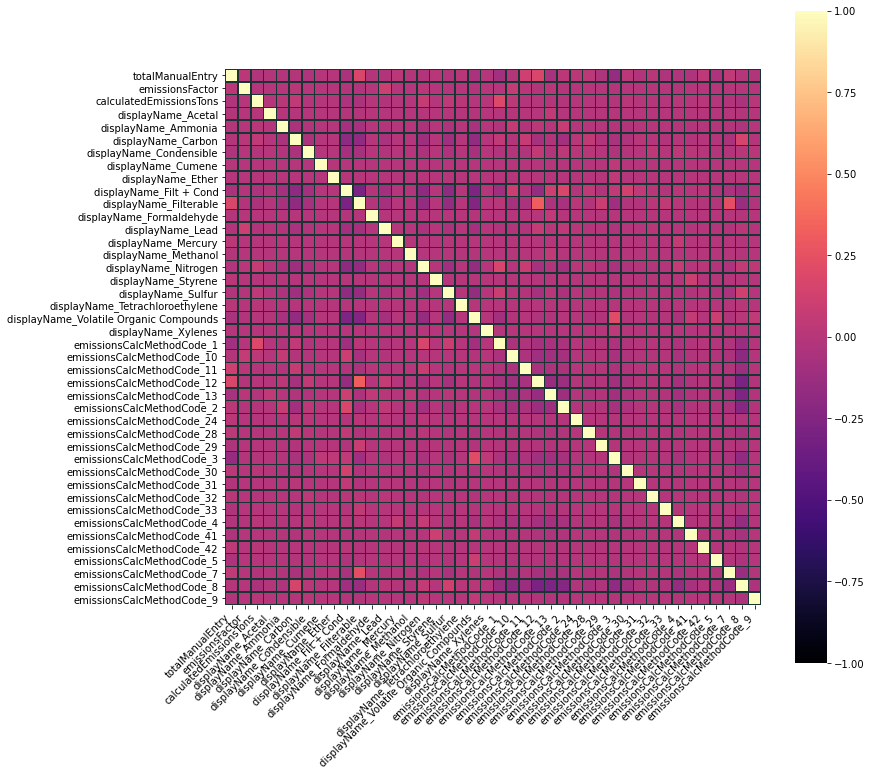

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,12))         # Sample figsize in inches

features = X_scaled.columns[2:]
corr = X_scaled[features].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap='magma',
    square=True,
    linecolor=(0.1,0.2,0.2),
    linewidth=.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Corr coef .5->1 is highly correlated

In [276]:
pandas.Series(corr.values.reshape(-1,1).T[0]).between(.49,1, inclusive=False).sum()

0

# Principle Component Analysis (PCA)
-   Select variables according to the magnitude (from largest to smallest in absolute values) of their coefficients

In [277]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns



df = pandas.DataFrame()
pca = PCA()
pca_result = pca.fit_transform(X_scaled[features].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
for i in range(pca_result.shape[1]):
    print('Explained variation for principal component ',i,': {}'.format(pca.explained_variance_ratio_[i] * 100))
pca.explained_variance_ratio_.sum()

Explained variation for principal component  0 : 15.504106820657986
Explained variation for principal component  1 : 14.189036036436262
Explained variation for principal component  2 : 11.470970875113213
Explained variation for principal component  3 : 9.588415410107434
Explained variation for principal component  4 : 6.891977907354627
Explained variation for principal component  5 : 5.769636967599117
Explained variation for principal component  6 : 5.386213155490605
Explained variation for principal component  7 : 4.981571569548599
Explained variation for principal component  8 : 4.947200772588782
Explained variation for principal component  9 : 4.0653060889521555
Explained variation for principal component  10 : 3.124434780669797
Explained variation for principal component  11 : 2.4133217974668524
Explained variation for principal component  12 : 1.9919971932606357
Explained variation for principal component  13 : 1.7193648691608399
Explained variation for principal component  14 : 1

1.0

## The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors 
-   Magnitude = Importance
-   I ran this as an experiment to see if we could find anything useful in the data
-   It would be better suited for a dataset with labels or one with outliers contained within

In [278]:
plt.figure(figsize=(16,10))
px.scatter(df,
    x="pca-one", y="pca-two",
    color=X_scaled.id.astype(str),
    # legend="full",
    opacity=0.7
)

<Figure size 1152x720 with 0 Axes>

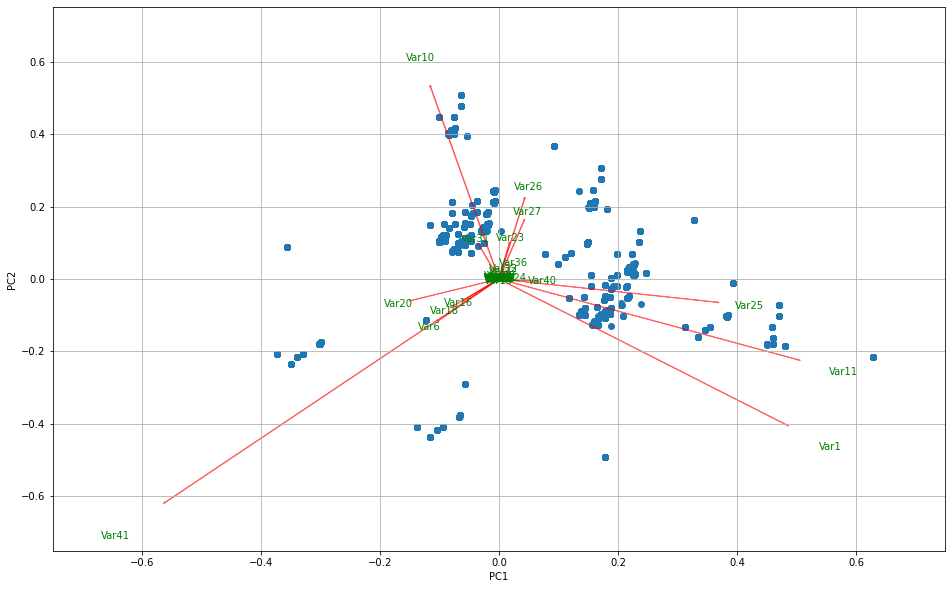

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler


plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="pca-one", y="pca-two",
#     hue=X_scaled.id.astype(str),
#     data=df,
#     # legend="full",
#     alpha=0.3
# )

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=labels)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-.75,.75)
plt.ylim(-.75,.75)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_result,np.transpose(pca.components_[0:2, :]))
plt.show()

In [280]:
# np.random.seed(42)


# number of components
n_pcs= pca.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,emissionsCalcMethodCode_8
1,PC1,emissionsCalcMethodCode_8
2,PC2,displayName_Filt + Cond
3,PC3,displayName_Volatile Organic Compounds
4,PC4,displayName_Nitrogen
5,PC5,emissionsCalcMethodCode_13
6,PC6,displayName_Carbon
7,PC7,displayName_Sulfur
8,PC8,emissionsCalcMethodCode_2
9,PC9,emissionsCalcMethodCode_10


## t-Distributed Stochastic Neighbor Embedding (t-SNE)
-   tSNE maps the data to a lower dimensions while keeping a similar distribution
-   Stochastic and iterative process that can be used for finding important model features
-   We will be using it strictly for visualization purposes

In [281]:
from sklearn.manifold import TSNE

X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)
# X_test = TSNE(n_components=2, random_state=42).transform(test_X)

## One Class State Vector Machine (SVM)
-   unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.
-   We will use the Radial Basis Function for the kernel

In [282]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', nu=.01, gamma=1e-04)  # .2 and 1e-04 were default
svm.fit(X_reduced)

OneClassSVM(gamma=0.0001, nu=0.01)

In [283]:
# extract the model predictions
x_predicted = svm.predict(X_reduced)

In [284]:
# define the meshgrid
x_min, x_max = X_reduced[:, 0].min() - 5, X_reduced[:, 0].max() + 5
y_min, y_max = X_reduced[:, 1].min() - 5, X_reduced[:, 1].max() + 5

In [285]:
x_ = np.linspace(x_min, x_max, 500)
y_ = np.linspace(y_min, y_max, 500)

xx, yy = np.meshgrid(x_, y_)

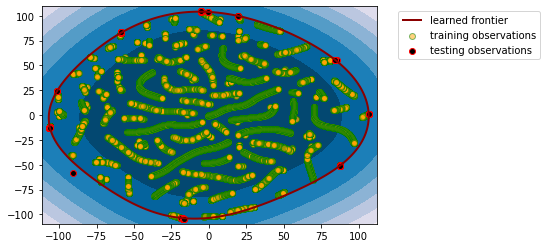

In [286]:
# evaluate the decision function on the meshgrid
z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
b = plt.scatter(X_reduced[x_predicted == 1, 0], X_reduced[x_predicted == 1, 1], c='orange', edgecolors='green', alpha=.5)
c = plt.scatter(X_reduced[x_predicted == -1, 0], X_reduced[x_predicted == -1, 1], c='k', edgecolors='r')
plt.legend([a.collections[0], b, c], ['learned frontier', 'training observations', 'testing observations'], bbox_to_anchor=(1.05, 1))
plt.axis('tight')
plt.show()

## Saving tSNE/OCSVM Model

In [287]:
import pickle

# save
with open('tsnse_OCSVM.pkl','wb') as f:
    pickle.dump(svm,f)

# load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

# clf2.predict(X[0:1])

## OCSVM
-   The top 31 features explained 99.94% of the variance in our model...<br>
    and include features that we cannot leave behind; **calculatedEmissionsTons** and **EmissionFactor**
-   *This is where I came to the conclusion that we shouldn't run these different types together.  Rather, we should run the test on the categorical data and continuous data separately and perhaps combine the results later in the pipeline.  Furthermore, it takes 32 components to account for 99% of the variance or we could use 16 to account for 95%.*

In [288]:
pca.explained_variance_ratio_[:32].sum()

0.99938982219275

In [289]:
from sklearn.model_selection import train_test_split

def OCSVM(prob=.05, influince=1e-04):
  features = df[1][:32].to_list()
  # Split X
  X_train, X_test = train_test_split(X_scaled[features], test_size=1/10, random_state=42)  # state ensures a reproducible split
  print('train_X: ', len(X_train[features]), '\ntest_X: ', len(X_train[features]))
  svm = OneClassSVM(kernel='rbf', nu=prob, gamma=influince)  # .2 and 1e-04 were default
  svm.fit(X_scaled[features])
  y_predicted_train = svm.predict(X_train)
  y_predicted_test = svm.predict(X_test)
  n_error_train = y_predicted_train[y_predicted_train == -1].size
  n_error_test = y_predicted_test[y_predicted_test == -1].size
  # # filter outlier index
  error_train_idx = np.where(y_predicted_train == -1)
  error_test_idx = np.where(y_predicted_test == -1)
  # # filter outlier values
  error_train_values = X.iloc[error_train_idx]
  error_test_values = X.iloc[error_test_idx]



  train_exs = len((X_train[features[2:]]))
  test_exs = len(X_train[features[2:]])
  train_rate = round(n_error_train/train_exs,2) * 100
  test_rate = round(n_error_test/test_exs,2) * 100
  print("error train:" + str(n_error_train) + "/" + str(train_exs) + " ("+str(train_rate)+"%) ; errors test:" +
                              str(n_error_test) +  "/" + str(test_exs) + "("+str(test_rate)+"%)")
  return error_test_values, svm

In [290]:
error_test_values,svm = OCSVM()

train_X:  10472 
test_X:  10472
error train:2383/10472 (23.0%) ; errors test:255/10472(2.0%)


Can't complain!

In [291]:
error_test_values,svm = OCSVM(.1,1e-1)

train_X:  10472 
test_X:  10472
error train:1885/10472 (18.0%) ; errors test:236/10472(2.0%)


In [292]:
error_test_values

,id,eid,totalManualEntry,emissionsFactor,calculatedEmissionsTons,displayName_Acetal,displayName_Ammonia,displayName_Carbon,displayName_Condensible,displayName_Cumene,...,emissionsCalcMethodCode_31,emissionsCalcMethodCode_32,emissionsCalcMethodCode_33,emissionsCalcMethodCode_4,emissionsCalcMethodCode_41,emissionsCalcMethodCode_42,emissionsCalcMethodCode_5,emissionsCalcMethodCode_7,emissionsCalcMethodCode_8,emissionsCalcMethodCode_9
7,1437,138691,0,0.161,3.726430,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1437,136766,0,0.280,6.480740,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1437,136765,0,0.025,1.467380,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1437,136763,0,0.730,16.810800,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
16,1437,138695,0,0.161,3.707590,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,210,19827,0,13.000,0.542172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1256,210,19828,0,0.500,0.020853,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1271,210,19837,0,7.600,0.474352,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1273,210,19846,0,5.500,0.343281,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [293]:
# save the model
with open('OCSVM.pkl','wb') as f:
    pickle.dump(svm,f)

## Isolation Forest

In [294]:
from sklearn.ensemble import IsolationForest

features = df[1][:32].to_list()
# Split X
X_train, X_test = train_test_split(X_scaled[features], test_size=1/10, random_state=42)  # state ensures a reproducible split
print('train_X: ', len(X_train[features]), '\ntest_X: ', len(X_train[features]))

if_clf = IsolationForest(contamination=0.08, max_features=1.0, max_samples=1.0, n_estimators=40)  # Obtained using grid search
if_clf.fit(X_train)

y_predicted_train = if_clf.predict(X_train)
y_predicted_test = if_clf.predict(X_test)

n_error_train = y_predicted_train[y_predicted_train == -1].size
n_error_test = y_predicted_test[y_predicted_test == -1].size
# # filter outlier index
error_train_idx = np.where(y_predicted_train == -1)
error_test_idx = np.where(y_predicted_test == -1)
# # filter outlier values
error_train_values = X.iloc[error_train_idx]
error_test_values = X.iloc[error_test_idx]



train_exs = len((X_train[features[2:]]))
test_exs = len(X_train[features[2:]])
train_rate = round(n_error_train/train_exs,2) * 100
test_rate = round(n_error_test/test_exs,2) * 100
print("error train:" + str(n_error_train) + "/" + str(train_exs) + " ("+str(train_rate)+"%) ; errors test:" +
                             str(n_error_test) +  "/" + str(test_exs) + "("+str(test_rate)+"%)")

train_X:  10472 
test_X:  10472
error train:838/10472 (8.0%) ; errors test:96/10472(1.0%)


In [295]:
# save the model
with open('IF.pkl','wb') as f:
    pickle.dump(if_clf,f)

## OCSVM Methods (depreciated)
-   Here I began creating methods.  But.. *time...*
-   Ignore the rest of this code.

In [296]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# def OCSVM_Scale_Reduce_train(X, random_state=42):
#   X_train = MinMaxScaler().fit_transform(train_X[features[2:]])
#   X_test = MinMaxScaler().fit_transform(test_X[features[2:]])

#   X_train = TSNE(n_components=2, random_state=random_state).fit_transform(X_train)
#   X_test = TSNE(n_components=2, random_state=random_state).fit_transform(test_X)

#   return X_train, X_test

def OCSVM_Scale_Reduce(X, random_state=42):
  features = X.columns[2:]
  X = MinMaxScaler().fit_transform(X[features])

  X = TSNE(n_components=2, random_state=random_state).fit_transform(X)

  return X

def OCSVM_split(X, X0):
  # Separating out the features
  features = X.columns[2:]
  # Separating out the values
  x = X.loc[:, features].values
  # test_size: what proportion of original data is used for test set
  train_X, test_X = train_test_split(X0, test_size=1/10, random_state=42)
  print('train_X: ', len(train_X), '\ntest_X: ', len(test_X))
  return train_X, test_X

def OCSVM_fit_predict(X_train, X_test, random_state=42, nu=.05, gamma=1e-04):
  svm = OneClassSVM(kernel='rbf', nu=nu, gamma=gamma)  # .2 and 1e-04 were default
  svm.fit(X_train)

  y_predicted_train = svm.predict(X_train)
  y_predicted_test = svm.predict(X_test)
  return y_predicted_train, y_predicted_test, X_train, X_test, train_X, test_X, svm

def OCSVM_plot(y_predicted_train, y_predicted_test, X_train, X_test, train_X, test_X):
  n_error_train = y_predicted_train[y_predicted_train == -1].size
  n_error_test = y_predicted_test[y_predicted_test == -1].size

  x_min, x_max = X_train[:, 0].min() - 5, X_train[:, 0].max() + 5
  y_min, y_max = X_train[:, 1].min() - 5, X_train[:, 1].max() + 5
  x_ = np.linspace(x_min, x_max, 500)
  y_ = np.linspace(y_min, y_max, 500)
  xx, yy = np.meshgrid(x_, y_)

  z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])

  z = z.reshape(xx.shape)

  plt.title("Novelty Detection")
  plt.contourf(xx, yy, z, levels=np.linspace(z.min(), 0, 7), cmap=plt.cm.PuBu)
  a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
  plt.contourf(xx, yy, z, levels=[0, z.max()], colors='palevioletred')

  s = 40
  b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='orange', s=s, alpha=.5, edgecolors='k')
  b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, alpha=.2, edgecolors='k')
  # c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                # edgecolors='k')
  train_exs = len((train_X[features[2:]]))
  test_exs = len(test_X[features[2:]])
  train_rate = round(n_error_train/train_exs,2) * 100
  test_rate = (n_error_test/test_exs) * 100
  plt.xlabel("error train:" + str(n_error_train) + "/" + str(train_exs) + " ("+str(train_rate)+"%) ; errors test:" +
                            str(n_error_test) +  "/" + str(test_exs) + "("+str(test_rate)+"%)")
  plt.show()

def OCSVM_find_error(y_predicted_train, y_predicted_test, X, X_train):
  # filter outlier index
  error_train_idx = y_predicted_train[y_predicted_train == -1]
  error_test_idx = y_predicted_test[y_predicted_test == -1]
  # filter outlier values
  error_train_values = X.iloc[error_train_idx]
  error_test_values = X.iloc[error_test_idx]

  error_list=[]
  for row_index, (input, prediction ) in enumerate(zip (X_train, y_predicted_train)):
      if prediction != 1:
        error_list.append(row_index)

  error_df = train_X.iloc[error_list]
  return error_train_values, error_test_values, error_df
  

In [297]:
X0 = shuffles[0]
X0_sr = OCSVM_Scale_Reduce(X0, random_state=42)
train_X0, test_X0 = OCSVM_split(X0, X0_sr)
y_predicted_train0, y_predicted_test0, X_train0, X_test0, train_X0, test_X0, svm0 = OCSVM_fit_predict(train_X0, test_X0, random_state=42, nu=.05, gamma=1e-04)
OCSVM_plot(y_predicted_train0, y_predicted_test0, X_train0, X_test0, train_X0, test_X0)
error_train_values0, error_test_values0, error_df0 = OCSVM_find_error(y_predicted_train0, y_predicted_test0, X0, X_train0)

NameError: name 'shuffles' is not defined

In [ ]:
error_train_values0, error_test_values0, error_df0 = OCSVM_find_error(y_predicted_train0, y_predicted_test0, X0, X_train0)
error_df0

In [ ]:
X1 = shuffles[1]
X1_sr = OCSVM_Scale_Reduce(X1, random_state=42)
train_X1, test_X1 = OCSVM_split(X1, X1_sr)
y_predicted_train1, y_predicted_test1, X_train1, X_test1, train_X1, test_X1, svm1 = OCSVM_fit_predict(train_X1, test_X1, random_state=42, nu=.05, gamma=1e-04)
OCSVM_plot(y_predicted_train1, y_predicted_test1, X_train1, X_test1, train_X1, test_X1)
error_train_values1, error_test_values1, error_df1 = OCSVM_find_error(y_predicted_train1, y_predicted_test1, X1, X_train1)

In [ ]:
error_df1

In [ ]:
X2 = shuffles[2]
X2_sr = OCSVM_Scale_Reduce(X2, random_state=42)
train_X2, test_X2 = OCSVM_split(X2, X2_sr)
y_predicted_train2, y_predicted_test2, X_train2, X_test2, train_X2, test_X2, svm2 = OCSVM_fit_predict(train_X2, test_X2, random_state=42, nu=.05, gamma=1e-04)
OCSVM_plot(y_predicted_train2, y_predicted_test2, X_train2, X_test2, train_X2, test_X2)
error_train_values2, error_test_values2, error_df2 = OCSVM_find_error(y_predicted_train2, y_predicted_test2, X2, X_train2)

In [ ]:
error_df2

In [ ]:
OCSVM_plot(y_predicted_train0, y_predicted_test0, X_train0, X_test0, train_X0, test_X0)
OCSVM_plot(y_predicted_train1, y_predicted_test1, X_train1, X_test1, train_X1, test_X1)
OCSVM_plot(y_predicted_train2, y_predicted_test2, X_train2, X_test2, train_X2, test_X2)

In [ ]:
reject_scale_reduce = OCSVM_Scale_Reduce(reject)
reject_predicted0 = svm0.predict(reject_scale_reduce)
reject_predicted1 = svm1.predict(reject_scale_reduce)
reject_predicted2 = svm2.predict(reject_scale_reduce)

In [ ]:
  # filter outlier index
  error_reject_idx = reject_predicted0[[reject_predicted0] == -1]
  # # filter outlier values
  # error_reject_values = X0.iloc[error_reject_idx]

  reject_list=[]
  for row_index, (input, prediction ) in enumerate(zip (X0, reject_predicted0)):
      if prediction != 1:
        print(x)
  reject_list